In [1]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data's given
df = pd.read_csv('classification_train.csv')
arr = df.to_numpy()
x_values_train = arr[:24000,2:786]
y_values_train = arr[:24000,1]
x_values_test = arr[24000:,2:786]
y_values_test = arr[24000:,1]
y_values = arr[:,1]
#for finding number of training examples and number of features
m = len(x_values_train)
n = len(df.columns)-2

#to view the csv file
df.head()
print(x_values_train.shape)
print(m)

(24000, 784)
24000


In [3]:
num_unique = np.unique(y_values)
print((num_unique))
y_classes = np.zeros((30000,len(num_unique)))
for j in range(len(num_unique)):
    for i in range(30000):
        if y_values[i] == num_unique[j]:
            y_classes[i,j] = 1
y_classes = y_classes.T
print(y_classes.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 30000)


In [4]:
num_unique = np.unique(y_values_train)
print((num_unique))
y_classes_train = np.zeros((m,len(num_unique)))
for j in range(len(num_unique)):
    for i in range(m):
        if y_values_train[i] == num_unique[j]:
            y_classes_train[i,j] = 1
y_classes_train = y_classes_train.T
print(y_classes_train.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 24000)


In [5]:
def softplus(z):
    answer = np.log(1+np.exp(z))
    return answer

In [6]:
def sigmoid(z):
    answer = 1/(1+np.exp(-z))
    return answer

In [7]:
def sigmoid_der(z):
    answer = sigmoid(z)*(1-sigmoid(z))
    return answer

In [8]:
def softmax(z):
    number = np.exp(z)
    tmp = np.sum(number,axis=1)
    tmp = np.expand_dims(tmp,axis=1)
    soft = number/tmp
    return soft

In [9]:
def cross_entropy_loss(y,a):
    answer = (1/m)*np.sum(y*np.log(a))
    return -answer

In [10]:
#to find mean
def mean(x_values,m,n):
    mean = np.zeros(n,)
    for j in range(n):
        summation = 0
        for i in range(m):
            summation += x_values[i,j]
        mean[j] = summation/m
    return mean

In [11]:
#to find standard deviation
def std_deviation(x_values,mean,m,n):
    summation = np.zeros(n,)
    standard_deviation = np.zeros(n,)
    for j in range(n):
        for i in range(m):
            summation[j] += ((x_values[i,j]-mean[j])**2)
        summation[j] = (summation[j]/m)
        standard_deviation[j] = math.sqrt(summation[j])
    return standard_deviation

In [12]:
#implementing the z score normalization
def z_score(x_values,m,n):
    avg = mean(x_values,m,n)
    standard_deviation = std_deviation(x_values,avg,m,n)
    x_modified = np.zeros_like(x_values)
    for j in range(n):
        for i in range(m):
            x_modified[i,j]= ((x_values[i,j]-avg[j])/standard_deviation[j])
    return x_modified

In [13]:
#for getting the number of nodes 
num_nodes = np.array([0])
num_nodes[0] = int(input(" Enter the number of neurons for hidden layer "+str(1)+" : "))

 Enter the number of neurons for hidden layer 1 : 28


In [14]:
w = [0]*2
b = [0]*2
input_layer = n
output_layer = len(num_unique)
w[0] = np.random.randn(input_layer,num_nodes[0])*0.01
b[0] = np.zeros((num_nodes[0],))
input_layer = num_nodes[0]
w[1] = np.random.randn(input_layer,output_layer)*0.01
b[1] = np.zeros((output_layer,))
print(w[0].shape,w[1].shape)

(784, 28) (28, 10)


In [15]:
z_hidden = [0]*1
a_hidden = [0]*1
a = x_values_train/255
def neural_network(alpha,num_iters):
    loss_arr = np.zeros(num_iters,)
    for i in range(num_iters):
        #forward propogation
        #phase 1 
        z_hidden[0] = np.dot(a,w[0])+b[0]
        a_hidden[0] = sigmoid(z_hidden[0])
        #phase 2
        z_out = np.dot(a_hidden[0],w[1])+b[1]
        a_out = softmax(z_out)
        #backward propogation
        #phase 1
        dJ_dzo = a_out - y_classes_train.T
        dzo_dwo = a_hidden[0]
        dJ_dwo = (1/m)*np.dot(dzo_dwo.T,dJ_dzo)
        dJ_dbo = (1/m)*dJ_dzo
        #phase 2
        dzo_dah1 = w[1]
        dJ_dah1 = np.dot(dJ_dzo,dzo_dah1.T)
        dah1_dzh1 = sigmoid_der(z_hidden[0])
        dzh1_dwh1 = x_values_train
        dJ_dw1 = (1/m)*np.dot(dzh1_dwh1.T,dah1_dzh1*dJ_dah1)
        dJ_db1 = (1/m)*dJ_dah1*dah1_dzh1
        #updating weights and biases
        w[0] = w[0] - alpha*dJ_dw1
        b[0] = b[0] - alpha*dJ_db1.sum(axis=0)
        
        w[1] = w[1] - alpha*dJ_dwo
        b[1] = b[1] - alpha*dJ_dbo.sum(axis=0)
        
        #if(i%10==0):
        error = cross_entropy_loss(y_classes_train.T,a_out)
        loss_arr[i]=error
        print("error at iteration "+str(i)+" : "+str(error))
            
    return a_out,loss_arr

In [16]:
a_out = np.zeros((30000,10))
loss_array = np.zeros(500,)
a_out,loss_array = neural_network(0.3,500)

error at iteration 0 : 2.3028153615499174
error at iteration 1 : 2.2759999717439596
error at iteration 2 : 2.239037469871893
error at iteration 3 : 2.2085266549483413
error at iteration 4 : 2.170828744097045
error at iteration 5 : 2.1177476202966625
error at iteration 6 : 2.0431356139295795
error at iteration 7 : 1.9784717398679628
error at iteration 8 : 1.9076296908828305
error at iteration 9 : 1.8842802790731672
error at iteration 10 : 1.8333002637295226
error at iteration 11 : 1.7831368808678074
error at iteration 12 : 1.7442487092744823
error at iteration 13 : 1.7207816879890274
error at iteration 14 : 1.7040809275736206
error at iteration 15 : 1.6812878559448674
error at iteration 16 : 1.6373229784388288
error at iteration 17 : 1.6110299204237384
error at iteration 18 : 1.5751807761885777
error at iteration 19 : 1.5894851352484547
error at iteration 20 : 1.5554063771668112
error at iteration 21 : 1.529369833713762
error at iteration 22 : 1.4583286429595768
error at iteration 23 : 

error at iteration 190 : 0.6731618806235101
error at iteration 191 : 0.6721864924014174
error at iteration 192 : 0.668158676076758
error at iteration 193 : 0.6669795871115692
error at iteration 194 : 0.6651773700455126
error at iteration 195 : 0.6646444307704087
error at iteration 196 : 0.6658527852096466
error at iteration 197 : 0.6648601501924291
error at iteration 198 : 0.6741605543300332
error at iteration 199 : 0.6700878013561065
error at iteration 200 : 0.7136782823752075
error at iteration 201 : 0.6945055926669799
error at iteration 202 : 0.7107394694847736
error at iteration 203 : 0.6776102441147089
error at iteration 204 : 0.6539247819803733
error at iteration 205 : 0.6398804027470559
error at iteration 206 : 0.6337299053187097
error at iteration 207 : 0.6337117038403834
error at iteration 208 : 0.6541128902774117
error at iteration 209 : 0.6481788167863886
error at iteration 210 : 0.6489483645766988
error at iteration 211 : 0.6478136241785659
error at iteration 212 : 0.646592

error at iteration 377 : 0.5500971452651883
error at iteration 378 : 0.5512418838222093
error at iteration 379 : 0.5974155258884957
error at iteration 380 : 0.5665909345214348
error at iteration 381 : 0.543429896519328
error at iteration 382 : 0.5519350564304981
error at iteration 383 : 0.5488422727873448
error at iteration 384 : 0.5138090057740095
error at iteration 385 : 0.5155999191352066
error at iteration 386 : 0.5049654055507242
error at iteration 387 : 0.5045073374399632
error at iteration 388 : 0.4863394657865277
error at iteration 389 : 0.4884128307399869
error at iteration 390 : 0.4868371360561211
error at iteration 391 : 0.5013075775390053
error at iteration 392 : 0.5080188497594822
error at iteration 393 : 0.5102786770214365
error at iteration 394 : 0.5016367944865343
error at iteration 395 : 0.4973616937622952
error at iteration 396 : 0.5171534848888177
error at iteration 397 : 0.5145813253636975
error at iteration 398 : 0.4996897890898468
error at iteration 399 : 0.504157

In [17]:
z_hidden[0] = np.dot(x_values_test,w[0])+b[0]
a_hidden[0] = sigmoid(z_hidden[0])
z_out = np.dot(a_hidden[0],w[1])+b[1]
a_out = softmax(z_out)
index = np.zeros((6000,))
for i in range(6000):
    index[i] = np.argmax(a_out[i])
print(index)
print(y_values_test.shape)

[4. 0. 1. ... 9. 4. 0.]
(6000,)


/var/folders/tn/p1mwx11x7bz4zrgn6grwsvyh0000gn/T/ipykernel_62325/361565086.py:2: RuntimeWarning: overflow encountered in exp
  answer = 1/(1+np.exp(-z))


In [18]:
#for checking accuracy
def accuracy(y_predicted):
    equal = np.sum(y_predicted==y_values_test)
    accuracy = (equal/6000)*100
    return accuracy

In [19]:
print(accuracy(index))

82.93333333333334


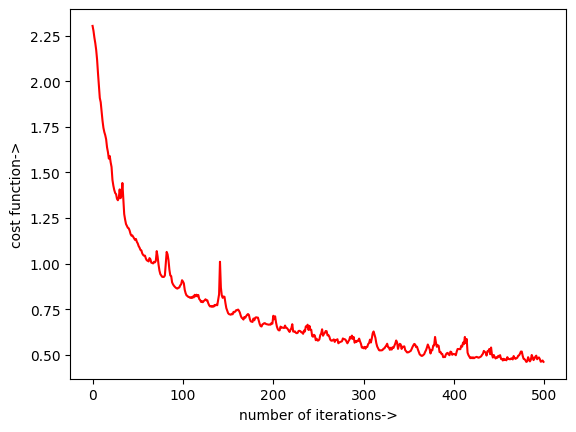

In [21]:
#plot the graph of iterations vs cost function
plt.plot(np.arange(500),loss_array,c='r')
plt.xlabel('number of iterations->')
plt.ylabel('cost function->')
plt.show()